In [1]:
# pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler
import pickle
from os import path

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [2]:
data = pd.read_csv('train.csv')
stores = pd.read_csv('stores.csv')
features = pd.read_csv('features.csv')

# CHECKING FOR BASIC INFORMATION ABOUT DATA.CSV

In [3]:
data.shape

(421570, 5)

In [4]:
data.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05-02-2010,24924.50,False
1,1,1,12-02-2010,46039.49,True
2,1,1,19-02-2010,41595.55,False
3,1,1,26-02-2010,19403.54,False
4,1,1,05-03-2010,21827.90,False


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


# CHECKING FOR BASIC INFORMATION ABOUT STORE.CSV

In [7]:
stores.shape

(45, 3)

In [8]:
stores.head(5)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [9]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


# CHECKING FOR BASIC INFORMATION ABOUT FEATURES.CSV

In [10]:
features.shape

(8190, 12)

In [11]:
features.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05-02-2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12-02-2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19-02-2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26-02-2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05-03-2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [12]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


# HANDLING THE MISSING VALUES OF FEATURE DATASET

In [5]:
features["CPI"].fillna(features["CPI"].mean(),inplace=True)
features["Unemployment"].fillna(features["Unemployment"].mean(),inplace=True)
for i in range(1,6):
    features["MarkDown"+str(i)] = features["MarkDown"+str(i)].apply(lambda x: 0 if x < 0 else x)
    features["MarkDown"+str(i)].fillna(value=0,inplace=True)
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     8190 non-null   float64
 5   MarkDown2     8190 non-null   float64
 6   MarkDown3     8190 non-null   float64
 7   MarkDown4     8190 non-null   float64
 8   MarkDown5     8190 non-null   float64
 9   CPI           8190 non-null   float64
 10  Unemployment  8190 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


# Merging Training Dataset and merged stores-features Dataset

In [6]:
data = pd.merge(data,stores,on='Store',how='left')


data = pd.merge(data,features,on=['Store','Date'],how='left')


data['Date'] = pd.to_datetime(data['Date'])


data.sort_values(by=['Date'],inplace=True)


data.set_index(data.Date, inplace=True)


data['IsHoliday_x'].isin(data['IsHoliday_y']).all()


C:\Users\Dhyey Shah\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Dhyey Shah\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Dhyey Shah\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Dhyey Shah\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-03-2010' in DD/MM/YYYY format. Prov

True

In [7]:
data.drop(columns='IsHoliday_x',inplace=True)
data.rename(columns={"IsHoliday_y" : "IsHoliday"}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-01-10 to 2012-12-10
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   Type          421570 non-null  object        
 5   Size          421570 non-null  int64         
 6   Temperature   421570 non-null  float64       
 7   Fuel_Price    421570 non-null  float64       
 8   MarkDown1     421570 non-null  float64       
 9   MarkDown2     421570 non-null  float64       
 10  MarkDown3     421570 non-null  float64       
 11  MarkDown4     421570 non-null  float64       
 12  MarkDown5     421570 non-null  float64       
 13  CPI           421570 non-null  float64       
 14  Unemployment  421570 non-null  float64       
 15  I

In [16]:
data.head(5)

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,,,,,,
2010-01-10,33,96,2010-01-10,7854.09,A,39690,91.45,3.001,0.0,0.0,0.0,0.0,0.0,126.234600,9.265,False
2010-01-10,17,93,2010-01-10,3533.76,B,93188,60.07,2.853,0.0,0.0,0.0,0.0,0.0,126.234600,6.885,False
2010-01-10,30,85,2010-01-10,43.92,C,42988,70.28,2.603,0.0,0.0,0.0,0.0,0.0,211.329874,8.163,False
2010-01-10,30,87,2010-01-10,119.80,C,42988,70.28,2.603,0.0,0.0,0.0,0.0,0.0,211.329874,8.163,False
2010-01-10,9,55,2010-01-10,6795.58,B,125833,69.08,2.603,0.0,0.0,0.0,0.0,0.0,215.214134,6.560,False


# DATA CLEANING

In [17]:
data.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [8]:
# Checking for duplicate values
print("There are {} duplicate values.".format(data.duplicated().sum()))
# df[data.duplicated(keep=False)].head(10)

There are 0 duplicate values.


In [9]:
# check for typo or wrong spelling for IsHoliday column
data["IsHoliday"].value_counts()

False    391909
True      29661
Name: IsHoliday, dtype: int64

# SPLITTING DATE COLUMN

In [10]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.week

C:\Users\Dhyey Shah\AppData\Local\Temp\ipykernel_23588\235201722.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['Week'] = data['Date'].dt.week


In [21]:
data.head(5)

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,Month,Week
Date,,,,,,,,,,,,,,,,,,,
2010-01-10,33,96,2010-01-10,7854.09,A,39690,91.45,3.001,0.0,0.0,0.0,0.0,0.0,126.234600,9.265,False,2010,1,1
2010-01-10,17,93,2010-01-10,3533.76,B,93188,60.07,2.853,0.0,0.0,0.0,0.0,0.0,126.234600,6.885,False,2010,1,1
2010-01-10,30,85,2010-01-10,43.92,C,42988,70.28,2.603,0.0,0.0,0.0,0.0,0.0,211.329874,8.163,False,2010,1,1
2010-01-10,30,87,2010-01-10,119.80,C,42988,70.28,2.603,0.0,0.0,0.0,0.0,0.0,211.329874,8.163,False,2010,1,1
2010-01-10,9,55,2010-01-10,6795.58,B,125833,69.08,2.603,0.0,0.0,0.0,0.0,0.0,215.214134,6.560,False,2010,1,1


In [22]:
data.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,2590.074819,880.070274,468.092929,1083.132268,1662.772385,171.201947,7.960289,2010.968591,6.478580,26.013457
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,6052.385934,5084.520381,5528.872994,3894.529945,4207.629321,39.159276,1.863296,0.796876,3.324757,14.525832
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.000000,0.000000,0.000000,0.000000,0.000000,126.064000,3.879000,2010.000000,1.000000,1.000000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,2010.000000,4.000000,14.000000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,2011.000000,6.000000,26.000000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,2012.000000,9.000000,38.000000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,2012.000000,12.000000,52.000000


In [11]:
# We can observe that weekly sales have negative values ..so rather than removing it we can replace it with positive values.
data['Weekly_Sales'] = data['Weekly_Sales'].clip(lower=0).replace(0, data['Weekly_Sales'].mean())

In [12]:
data['Weekly_Sales'].describe()

count    421570.000000
mean      16032.947547
std       22692.853526
min           0.010000
25%        2133.602500
50%        7715.425000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64

# OUTLIER DETECTION

In [13]:
agg_data = data.groupby(['Store', 'Dept']).Weekly_Sales.agg(['max', 'min', 'mean', 'median', 'std']).reset_index()
agg_data.isnull().sum()


Store      0
Dept       0
max        0
min        0
mean       0
median     0
std       37
dtype: int64

In [14]:
data['Total_MarkDown'] = data['MarkDown1']+data['MarkDown2']+data['MarkDown3']+data['MarkDown4']+data['MarkDown5']
data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1,inplace=True)


In [15]:
store_data = pd.merge(left=data,right=agg_data,on=['Store', 'Dept'],how ='left')
store_data.dropna(inplace=True)
data = store_data.copy()
del store_data


data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by=['Date'],inplace=True)
data.set_index(data.Date, inplace=True)
data.head()


,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,Total_MarkDown,max,min,mean,median,std
Date,,,,,,,,,,,,,,,,,,,,
2010-01-10,33,96,2010-01-10,7854.09,A,39690,91.45,3.001,126.234600,9.265,False,2010,1,1,0.0,15135.060000,5966.82,9371.822168,9256.12,1522.955734
2010-01-10,16,54,2010-01-10,20.00,B,57197,59.39,2.759,190.673824,6.986,False,2010,1,1,0.0,15981.258123,0.88,730.535212,50.00,3180.238865
2010-01-10,21,83,2010-01-10,396.64,B,140167,70.28,2.603,211.329874,8.163,False,2010,1,1,0.0,633.940000,29.24,200.042238,165.86,115.330332
2010-01-10,35,29,2010-01-10,6421.53,B,103681,70.19,2.707,136.629757,8.763,False,2010,1,1,0.0,20761.270000,5165.81,8768.500629,8166.33,2437.096725
2010-01-10,40,16,2010-01-10,4536.51,A,155083,62.01,2.717,132.756800,5.287,False,2010,1,1,0.0,48983.700000,2591.93,13322.372028,8072.52,11595.128668


In [16]:
fd=pd.read_csv('preprocessed_walmart_dataset.csv')

In [29]:
fd

,Date,Store,Dept,Date.1,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,...,IsHoliday,Year,Month,Week,Total_MarkDown,max,min,mean,median,std
0,2010-01-10,33,96,2010-01-10,7854.09,A,39690,91.45,3.001,126.234600,...,False,2010,1,1,0.00,15135.060000,5966.82,9371.822168,9256.12,1522.955734
1,2010-01-10,16,54,2010-01-10,20.00,B,57197,59.39,2.759,190.673824,...,False,2010,1,1,0.00,15981.258123,0.88,730.535212,50.00,3180.238865
2,2010-01-10,21,83,2010-01-10,396.64,B,140167,70.28,2.603,211.329874,...,False,2010,1,1,0.00,633.940000,29.24,200.042238,165.86,115.330332
3,2010-01-10,35,29,2010-01-10,6421.53,B,103681,70.19,2.707,136.629757,...,False,2010,1,1,0.00,20761.270000,5165.81,8768.500629,8166.33,2437.096725
4,2010-01-10,40,16,2010-01-10,4536.51,A,155083,62.01,2.717,132.756800,...,False,2010,1,1,0.00,48983.700000,2591.93,13322.372028,8072.52,11595.128668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421528,2012-12-10,23,8,2012-12-10,40491.98,B,114533,48.10,4.029,138.911700,...,False,2012,12,50,8075.26,52995.990000,29649.14,36710.240909,36321.40,3578.710421
421529,2012-12-10,26,80,2012-12-10,19970.16,A,152513,45.19,4.029,138.911700,...,False,2012,12,50,9349.67,25244.860000,15554.58,19365.780350,19007.32,2201.005483
421530,2012-12-10,35,60,2012-12-10,144.00,B,103681,55.40,4.000,142.937617,...,False,2012,12,50,8185.41,290.400000,7.00,93.416783,88.00,52.443275
421531,2012-12-10,33,90,2012-12-10,28873.10,A,39690,79.64,4.468,131.108333,...,False,2012,12,50,623.66,30293.310000,20641.47,24899.923147,24609.66,2182.477186


In [17]:
fd.drop(['Date.1'],axis=1,inplace=True)

In [31]:
fd.head(5)

,Date,Store,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,Total_MarkDown,max,min,mean,median,std
0,2010-01-10,33,96,7854.09,A,39690,91.45,3.001,126.234600,9.265,False,2010,1,1,0.0,15135.060000,5966.82,9371.822168,9256.12,1522.955734
1,2010-01-10,16,54,20.00,B,57197,59.39,2.759,190.673824,6.986,False,2010,1,1,0.0,15981.258123,0.88,730.535212,50.00,3180.238865
2,2010-01-10,21,83,396.64,B,140167,70.28,2.603,211.329874,8.163,False,2010,1,1,0.0,633.940000,29.24,200.042238,165.86,115.330332
3,2010-01-10,35,29,6421.53,B,103681,70.19,2.707,136.629757,8.763,False,2010,1,1,0.0,20761.270000,5165.81,8768.500629,8166.33,2437.096725
4,2010-01-10,40,16,4536.51,A,155083,62.01,2.717,132.756800,5.287,False,2010,1,1,0.0,48983.700000,2591.93,13322.372028,8072.52,11595.128668


# DATA VISUALIZATION

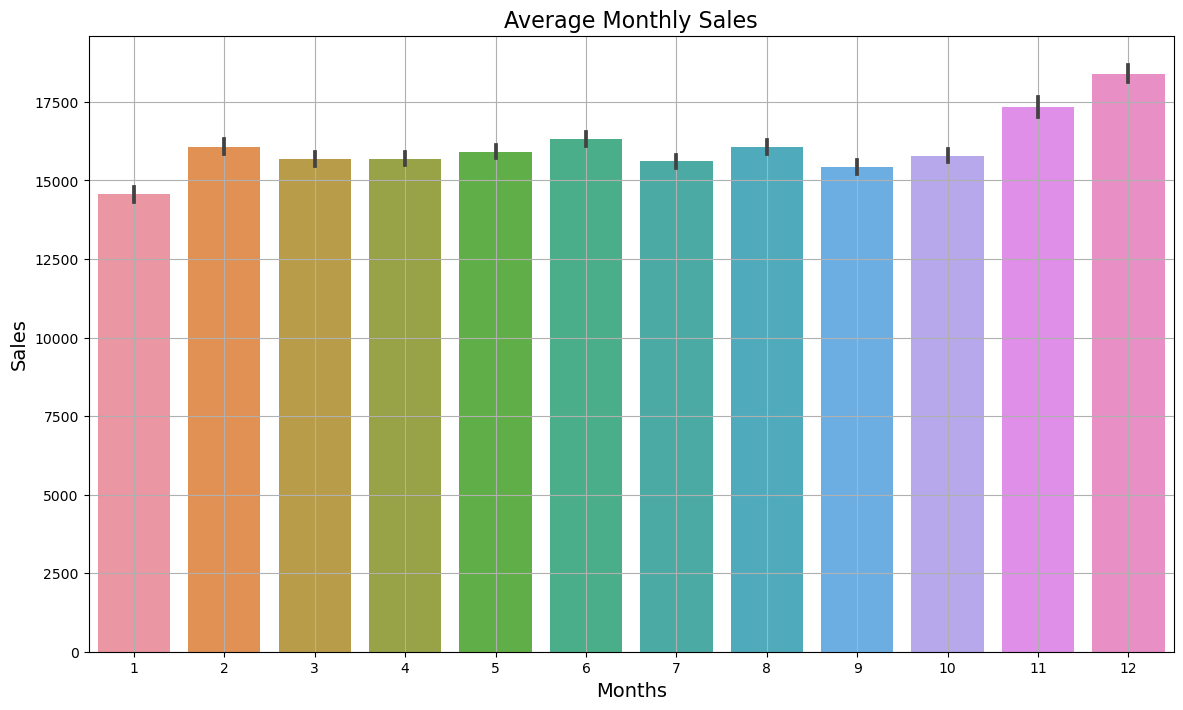

In [32]:
# Average Monthly Sales
plt.figure(figsize=(14,8))
sns.barplot(x='Month',y='Weekly_Sales',data=data)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Months',fontsize=14)
plt.title('Average Monthly Sales',fontsize=16)
# plt.savefig('avg_monthly_sales.png')
plt.grid()

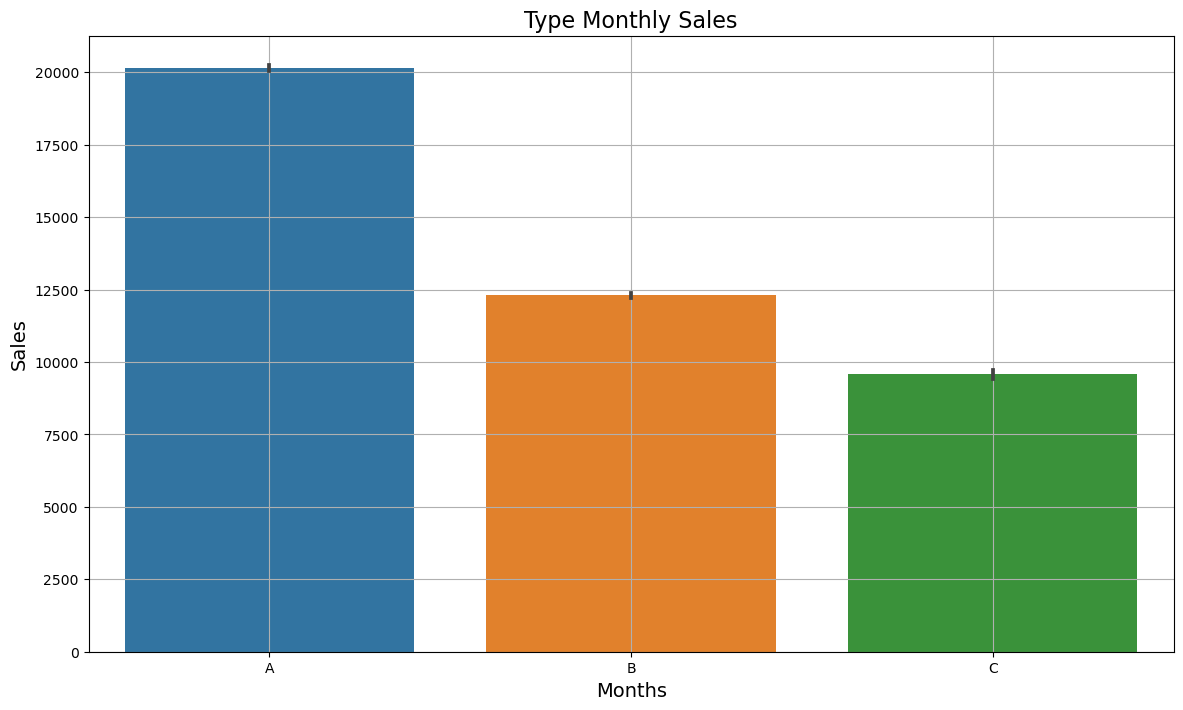

In [33]:
plt.figure(figsize=(14,8))
sns.barplot(x='Type',y='Weekly_Sales',data=data)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Months',fontsize=14)
plt.title('Type Monthly Sales',fontsize=16)
# plt.savefig('type_monthly_sales.png')
plt.grid()

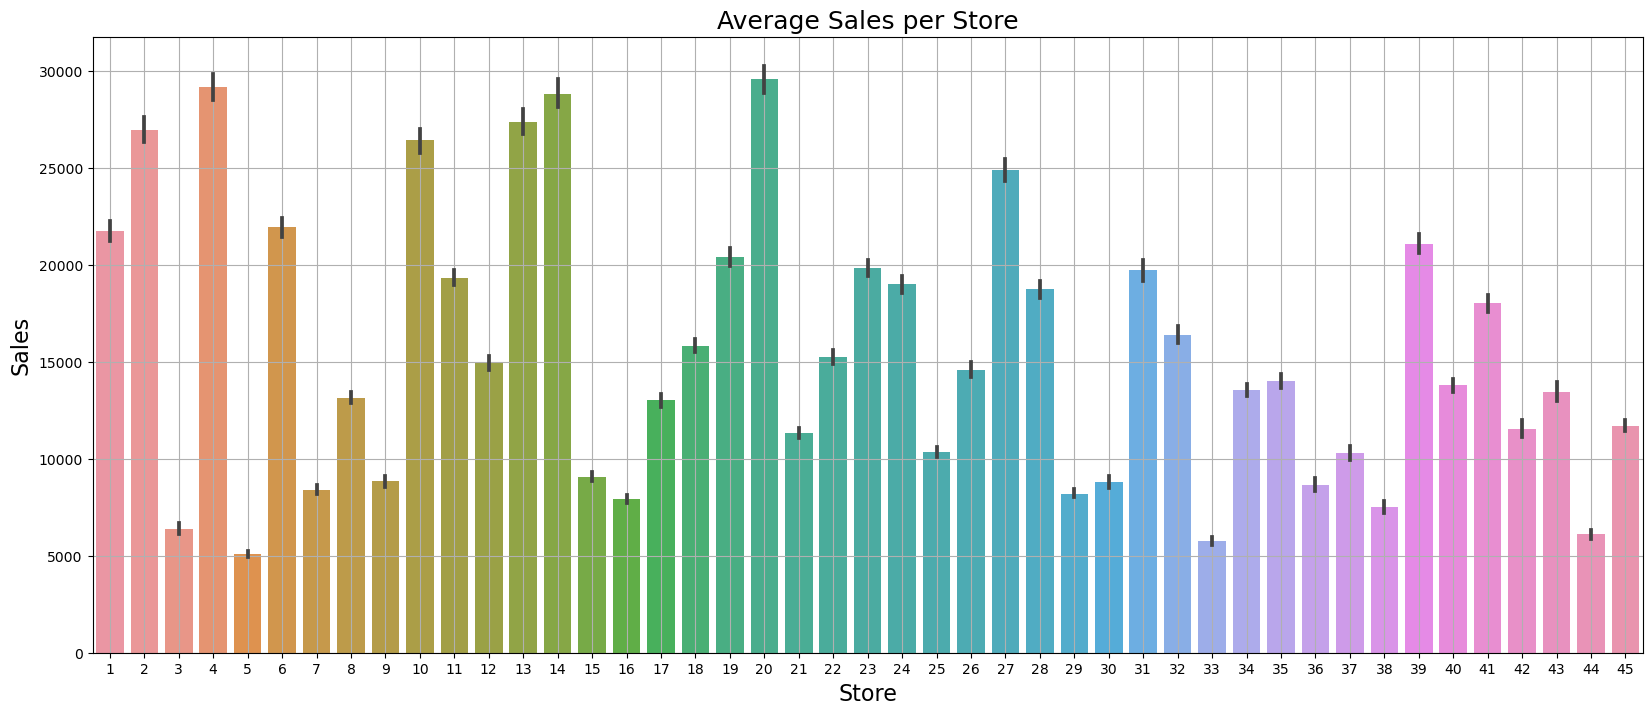

In [34]:
# Average Weekly Sales Store wise
plt.figure(figsize=(20,8))
sns.barplot(x='Store',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Average Sales per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
# plt.savefig('avg_sales_store.png')
plt.show()

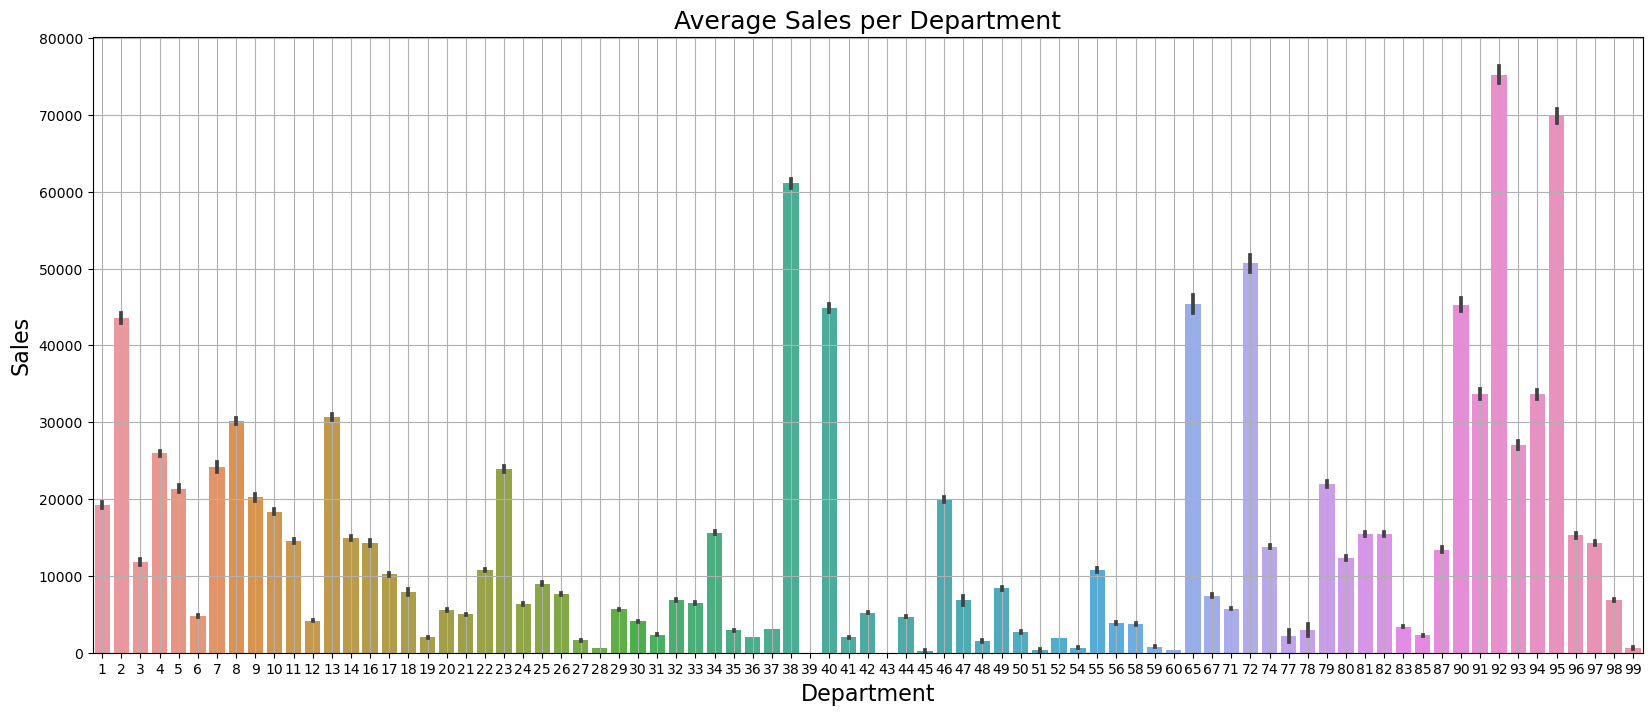

In [35]:
# Average Sales by Department
plt.figure(figsize=(20,8))
sns.barplot(x='Dept',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Average Sales per Department', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Department', fontsize=16)
# plt.savefig('avg_sales_dept.png')
plt.show()

C:\Users\Dhyey Shah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


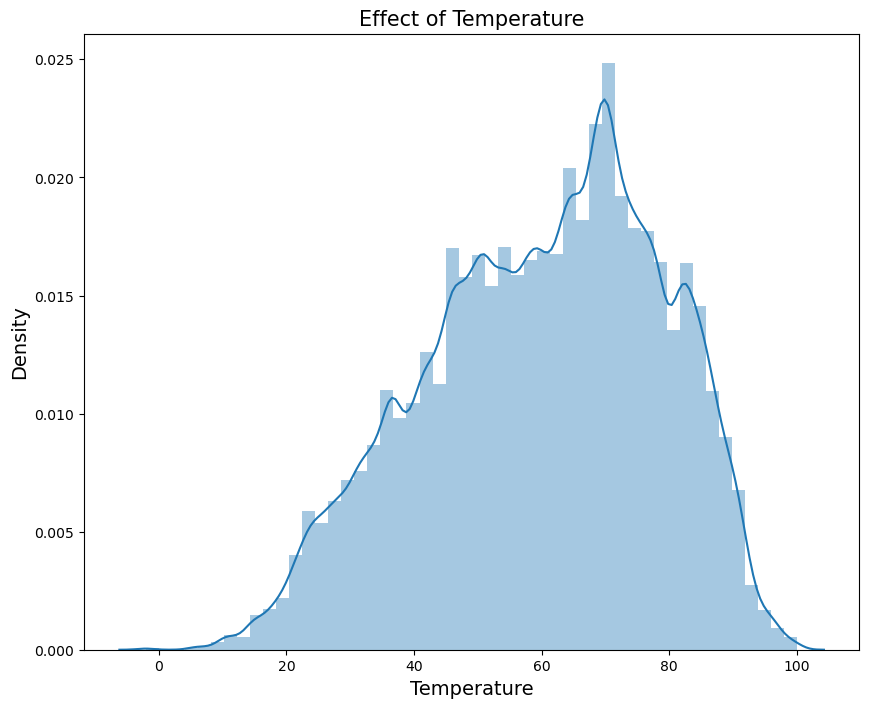

In [36]:
# Sales Vs Temperature
plt.figure(figsize=(10,8))
sns.distplot(data['Temperature'])
plt.title('Effect of Temperature',fontsize=15)
plt.xlabel('Temperature',fontsize=14)
plt.ylabel('Density',fontsize=14)
# plt.savefig('effect_of_temp.png')
plt.show()

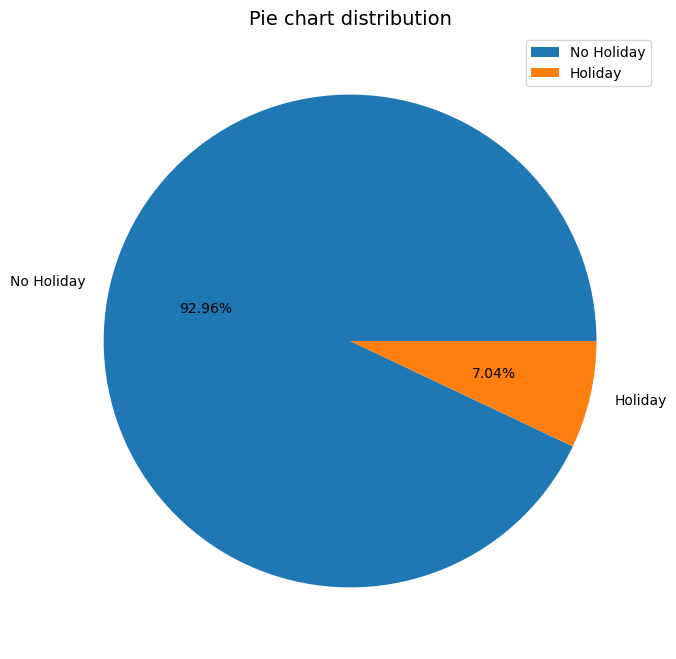

In [37]:
plt.figure(figsize=(8,8))
plt.pie(data['IsHoliday'].value_counts(),labels=['No Holiday','Holiday'],autopct='%0.2f%%')
plt.title("Pie chart distribution",fontsize=14)
plt.legend()
# plt.savefig('holiday_distribution.png')
plt.show()

# TIME SERIES DECOMPOSE

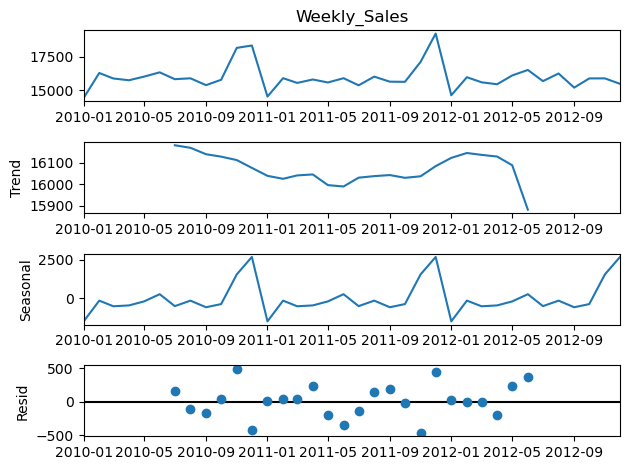

In [38]:
sm.tsa.seasonal_decompose(data['Weekly_Sales'].resample('MS').mean(), model='additive').plot()
# plt.savefig('seasonal_decompose.png')
plt.show()

# ONE HOT ENCODING

In [18]:
cat_col = ['Store','Dept','Type']
data_cat = fd[cat_col].copy()
data_cat.tail()

,Store,Dept,Type
421528,23,8,B
421529,26,80,A
421530,35,60,B
421531,33,90,A
421532,18,91,B


In [19]:
data_cat = pd.get_dummies(data_cat,columns=cat_col)
data_cat.head()

,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [20]:
final_data = pd.concat([fd, data_cat],axis=1)
final_data.shape

(421533, 149)

In [21]:
final_data.drop(columns=cat_col,inplace=True)
final_data.drop(columns=['Date'],inplace=True)
final_data.shape

(421533, 145)

# DATA NORMALIZATION

In [22]:
num_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown','max','min','mean','median','std']


minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df


final_data.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
0,7854.09,39690,91.45,3.001,126.234600,9.265,False,2010,1,1,...,0,0,0,1,0,0,0,1,0,0
1,20.00,57197,59.39,2.759,190.673824,6.986,False,2010,1,1,...,0,0,0,0,0,0,0,0,1,0
2,396.64,140167,70.28,2.603,211.329874,8.163,False,2010,1,1,...,0,0,0,0,0,0,0,0,1,0
3,6421.53,103681,70.19,2.707,136.629757,8.763,False,2010,1,1,...,0,0,0,0,0,0,0,0,1,0
4,4536.51,155083,62.01,2.717,132.756800,5.287,False,2010,1,1,...,0,0,0,0,0,0,0,1,0,0


In [23]:

final_data = normalization(final_data.copy(),num_col)


final_data.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
0,0.011332,0.026063,0.914971,0.265030,0.001686,0.516197,False,2010,1,1,...,0,0,0,1,0,0,0,1,0,0
1,0.000029,0.120825,0.601272,0.143788,0.638634,0.297776,False,2010,1,1,...,0,0,0,0,0,0,0,0,1,0
2,0.000572,0.569925,0.707828,0.065631,0.842808,0.410581,False,2010,1,1,...,0,0,0,0,0,0,0,0,1,0
3,0.009265,0.372434,0.706947,0.117735,0.104437,0.468085,False,2010,1,1,...,0,0,0,0,0,0,0,0,1,0
4,0.006545,0.650663,0.626908,0.122745,0.066155,0.134943,False,2010,1,1,...,0,0,0,0,0,0,0,1,0,0


# COORELATION MATRIX

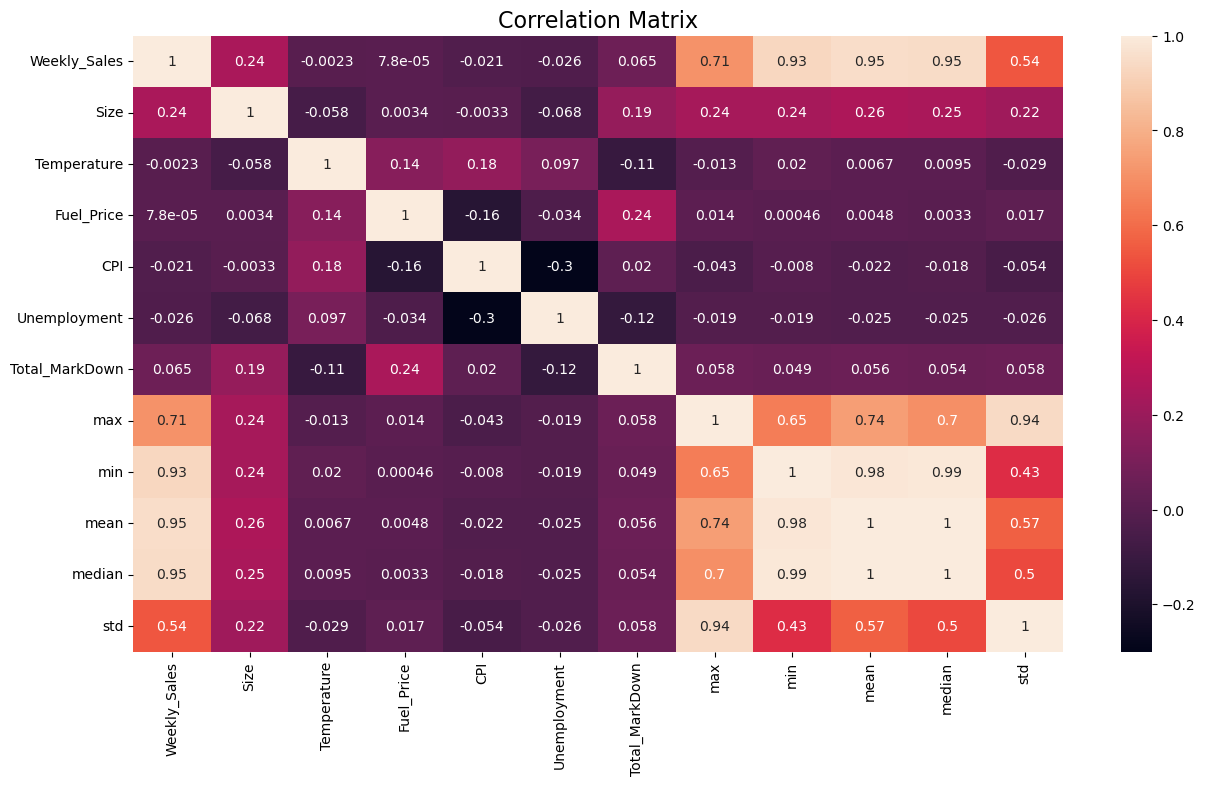

In [45]:
plt.figure(figsize=(15,8))
corr = final_data[num_col].corr()
sns.heatmap(corr,vmax=1.0,annot=True)
plt.title('Correlation Matrix',fontsize=16)
# plt.savefig('correlation_matrix.png')
plt.show()


# SPLITTING DATASET INTO TRAINING AND TESTING

In [24]:
X = final_data.drop(['Weekly_Sales'],axis=1)
Y = final_data.Weekly_Sales


X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)


# LINEAR REGRESSION MODEL


In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [27]:
y_pred = lr.predict(X_test_scaled)


In [28]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.004072761876308151
MSE 0.00010503627280321017
RMSE 0.010248720544692893
R2 0.9025487309553436


In [29]:
# calculate R-squared
print("Liner Regression R-squared: {}".format(lr.score(X_test_scaled, y_test)))

Liner Regression R-squared: 0.9025476016475216


# THEREFORE, ACCURACY OF LINEAR REGRESSION IS 90.25%

In [52]:

lr_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# lr_df.to_csv('./predictions/lr_real_pred.csv')
lr_df

,Actual,Predicted
109869,0.035781,0.037018
40844,0.000984,0.002832
412309,0.011024,0.014676
183199,0.011563,0.010760
357916,0.029383,0.027638
...,...,...
335085,0.054327,0.053217
417256,0.002109,0.002610
218513,0.009112,0.010891
231173,0.020055,0.029238


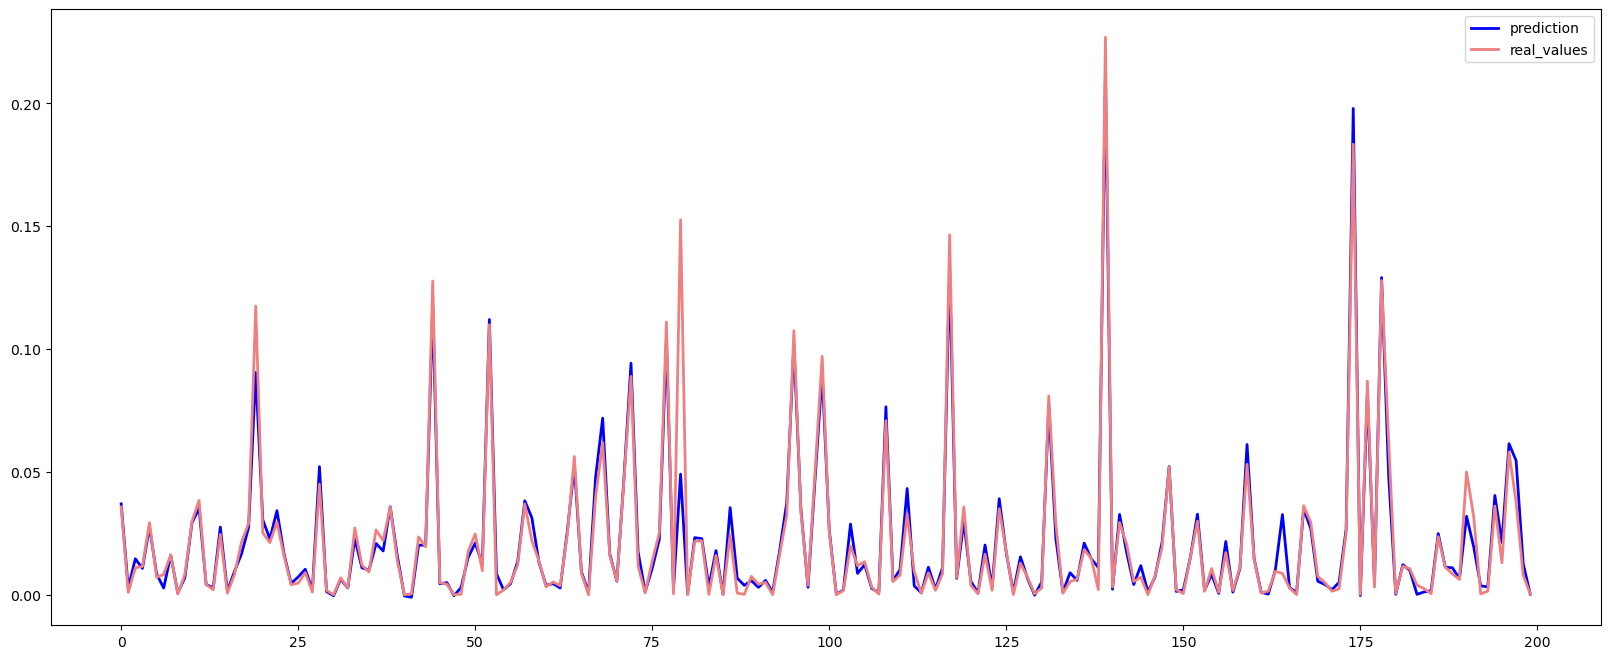

In [53]:
plt.figure(figsize=(20,8))
plt.plot(lr.predict(X_test_scaled[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
# plt.savefig('lr_real_pred.png')
plt.show()

# Saving the trained model

In [54]:
pkl_filename = "linear_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lr, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Saved model to disk


# RANDOM FOREST ALGORITHM

In [32]:
rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [33]:
rf_acc = rf.score(X_test_scaled,y_test)*100
print("Random Forest Regressor Accuracy - ",rf_acc)

Random Forest Regressor Accuracy -  96.3698155227305


In [34]:
y_pred = rf.predict(X_test_scaled)

In [35]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.0024699493049218286
MSE 3.9126902316074165e-05
RMSE 0.006255150063433664
R2 0.9636992202715698


In [36]:
rf_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# rf_df.to_csv('./predictions/rf_real_pred.csv')
rf_df

,Actual,Predicted
109869,0.035781,0.036994
40844,0.000984,0.002136
412309,0.011024,0.012027
183199,0.011563,0.011492
357916,0.029383,0.027219
...,...,...
335085,0.054327,0.053323
417256,0.002109,0.002208
218513,0.009112,0.009402
231173,0.020055,0.017498


# FEATURE IMPORTANCE USING GRIDSEARCHCV

In [37]:
# import libraries, we will use GridSearchCV to find the best parameter values
from sklearn.model_selection import GridSearchCV

In [38]:
# provide range for max_depth from 1 to 5 with an interval of 1 and from 1 to 50 with an interval of 1 for n_estimators
params = {'max_depth': list(range(20, 30, 2)), 'n_estimators': list(range(30, 40, 2))}
rf = RandomForestRegressor(random_state=0)

In [39]:
# use gridsearch to find the best parameter
forest_reg = GridSearchCV(rf, params, cv=5)

In [ ]:
%%time
# fit the model
forest_reg.fit(X_train_scaled, y_train)

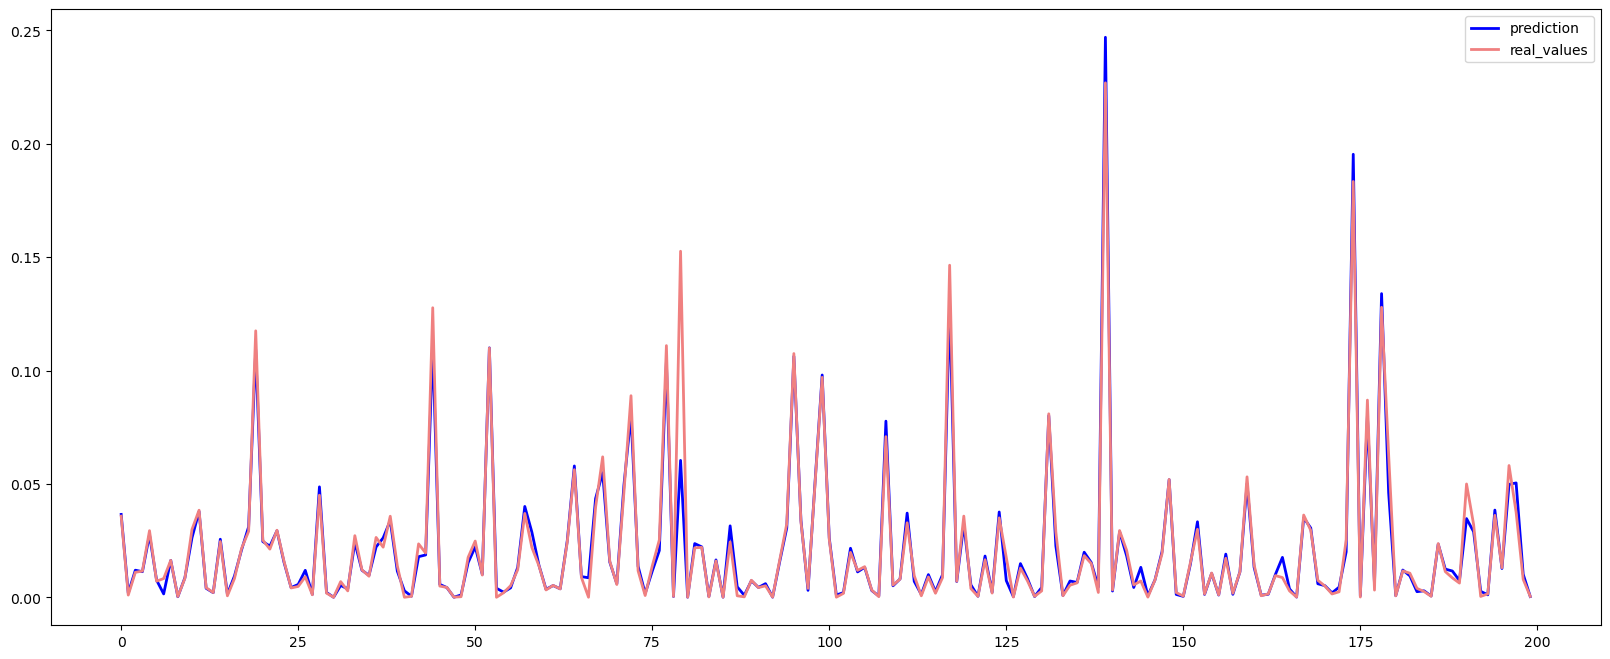

In [60]:
plt.figure(figsize=(20,8))
plt.plot(rf.predict(X_test_scaled[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
# plt.savefig('rf_real_pred.png')
plt.show()

In [61]:
pkl_filename = "randomforest_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(rf, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Saved model to disk


# K NEAREST NEIGHBOUR

In [62]:
knn = KNeighborsRegressor(n_neighbors = 2,weights = 'uniform')
knn.fit(X_train_scaled,y_train)

KNeighborsRegressor(n_neighbors=2)

In [63]:
knn_acc = knn.score(X_test_scaled, y_test)*100
print("KNeigbhbors Regressor Accuracy - ",knn_acc)

KNeigbhbors Regressor Accuracy -  90.12893986074721


In [64]:
y_pred = knn.predict(X_test_scaled)

In [65]:

print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.003468922806590188
MSE 0.00010639239086690778
RMSE 0.010314668723081113
R2 0.9013318657601292


In [66]:
knn_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
knn_df

,Actual,Predicted
109869,0.035781,0.037401
40844,0.000984,0.001973
412309,0.011024,0.010315
183199,0.011563,0.011512
357916,0.029383,0.026700
...,...,...
335085,0.054327,0.051103
417256,0.002109,0.001673
218513,0.009112,0.011843
231173,0.020055,0.020205


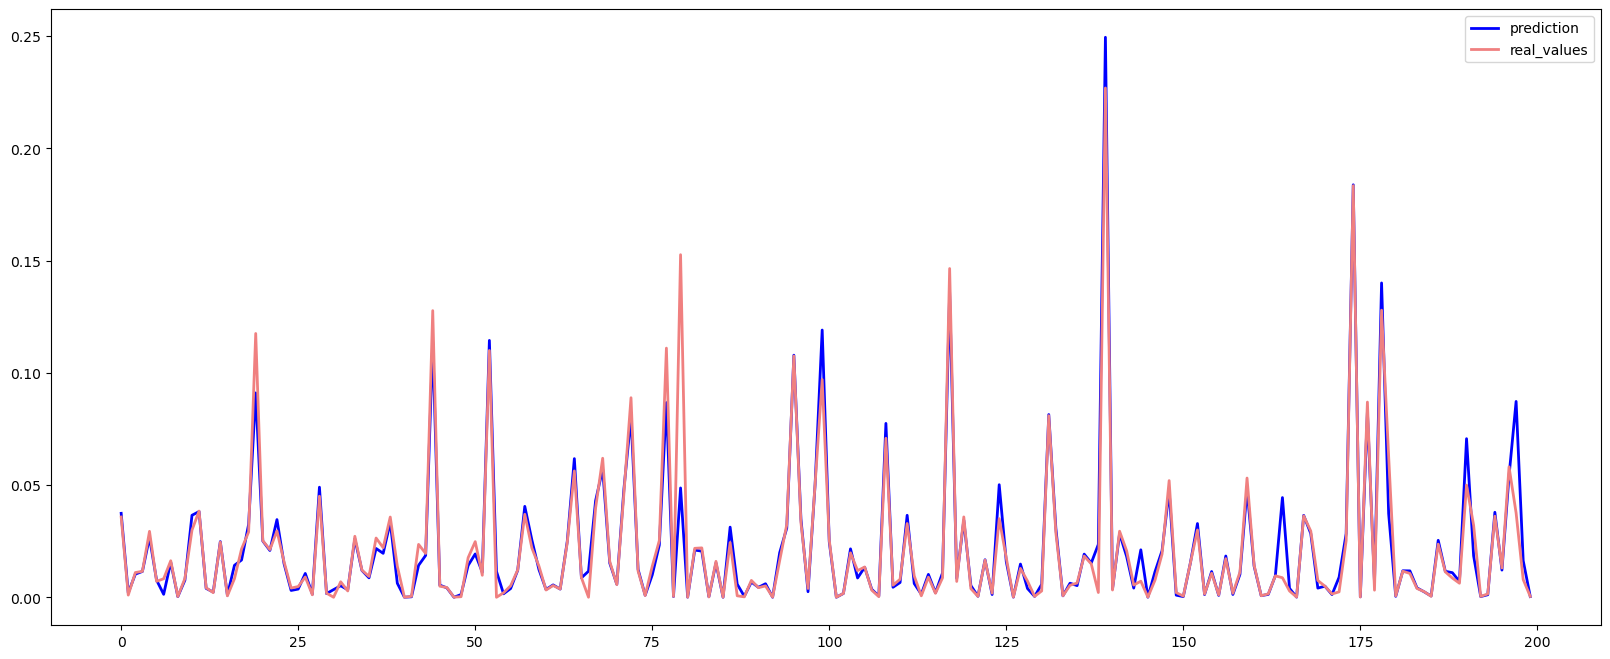

In [67]:
plt.figure(figsize=(20,8))
plt.plot(knn.predict(X_test_scaled[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
# plt.savefig('knn_real_pred.png')
plt.show()

# SAVING THE MODEL

In [68]:
pkl_filename = "knn_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(knn, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Saved model to disk


# XGBOOST

In [69]:
xgbr = XGBRegressor()
xgbr.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [70]:
xgb_acc = xgbr.score(X_test_scaled,y_test)*100
print("XGBoost Regressor Accuracy - ",xgb_acc)


XGBoost Regressor Accuracy -  97.04399923950207


In [71]:
y_pred = xgbr.predict(X_test_scaled)

In [72]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))


MAE 0.0027698999820476187
MSE 3.1860406468719777e-05
RMSE 0.005644502322501053
R2 0.9704400019110139


In [73]:
xgb_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
xgb_df

,Actual,Predicted
109869,0.035781,0.034746
40844,0.000984,0.001368
412309,0.011024,0.012192
183199,0.011563,0.010836
357916,0.029383,0.026703
...,...,...
335085,0.054327,0.052616
417256,0.002109,0.002745
218513,0.009112,0.010657
231173,0.020055,0.036027


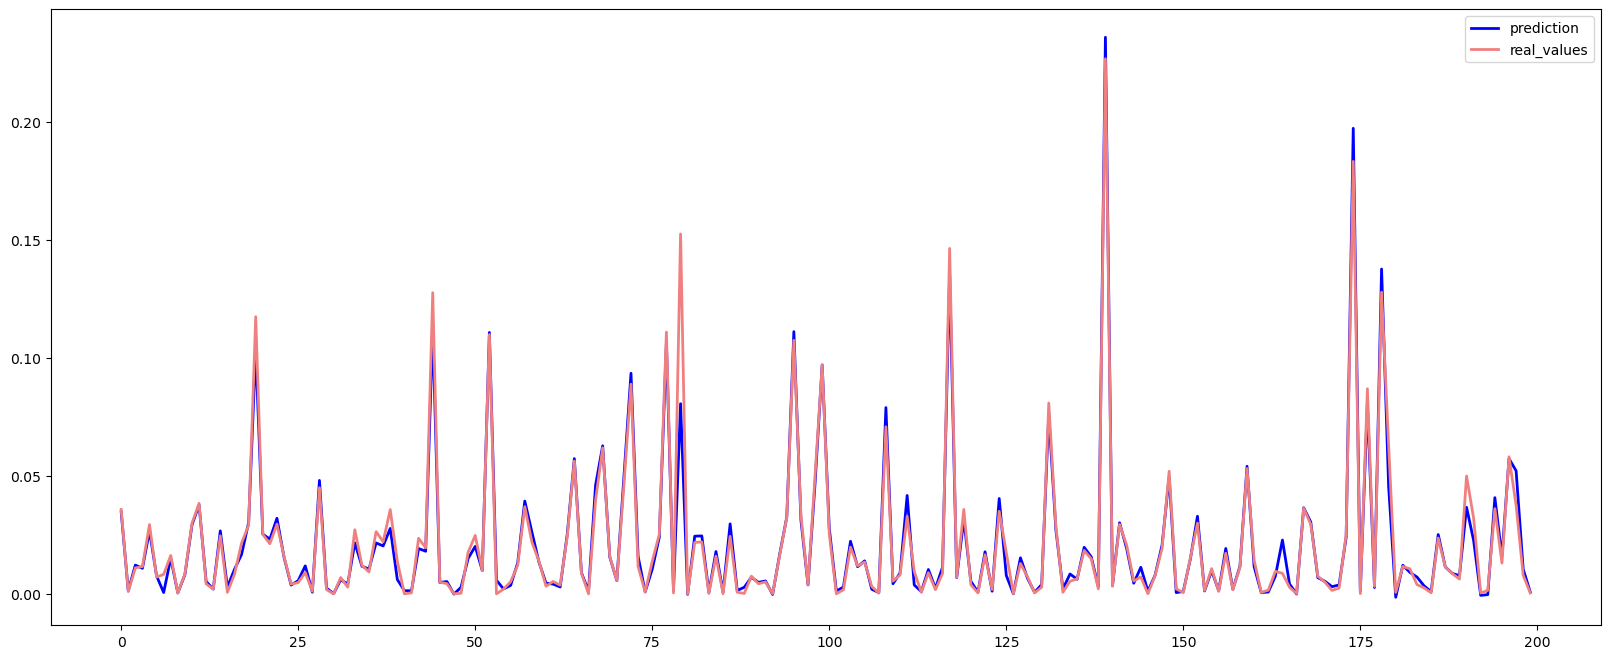

In [74]:
plt.figure(figsize=(20,8))
plt.plot(xgbr.predict(X_test_scaled[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
# plt.savefig('xgb_real_pred.png')
plt.show()

In [75]:
pkl_filename = "xgboost_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(xgbr, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Saved model to disk


In [5]:
model_params ={
    'linearreg':{
        'model':LinearRegression(),
        'params':{
            'C':[1,10,20],
            'kernel':['rfb','linear']
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,5,10],
            'criterion':['gini','entropy']
        }
    },
    'knn':{
        'model':KNeighborsRegressor(),
        'params':{
            'n_neighbors':[1,2,3],
            'weights':['uniform','distance'],
            'algorithm':['auto','brute']
        }
    },
     'xgboost':{
         'model':XGBRegressor()
      }   
}

SyntaxError: invalid non-printable character U+00A0 (1892275914.py, line 22)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor


model_params = {
    'LinearRegression': {
        'model': LinearRegression() ,
        'params': {
            'fit_intercept': [True, False],
            'normalize': [True, False]
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1, 5, 10],
            'criterion': ['mse', 'mae']
        }
    },
    'knn': {
        'model': KNeighborsRegressor(),
        'params': {
            'n_neighbors': [1, 2, 3],
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'brute']
        }
    },
    'xgboost': {
        'model': XGBRegressor()
    }
}


In [45]:
from sklearn.model_selection import GridSearchCV

scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X,Y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })


C:\Users\Dhyey Shah\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Dhyey Shah\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipelin

C:\Users\Dhyey Shah\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Dhyey Shah\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Dhyey Shah\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be re

ValueError: Unknown label type: 'continuous'

In [ ]:
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df